In [44]:
test = [4,1,7,8,3,7,10,50,60]
extra = [400,400,1000,8,1,1,100,4,200]

tup = zip(test,extra)
print(tup)

tar1 = 4
tar2 = 200

# for r in tup:
#     print(r,((abs(tar1 - r[0]))/tar1),((abs(tar2 - r[1]))/tar2))

tup = sorted(tup,key=lambda r: (((abs(tar1 - r[0]))/r[0])+((abs(tar2 - r[1]))/r[1])))
print(tup)


for r in tup:
    print(r,((abs(tar1 - r[0]))/r[0]),((abs(tar2 - r[1]))/r[1]),((abs(tar1 - r[0]))/r[0])+((abs(tar2 - r[1]))/r[1]))
             
# target = 7
# test = sorted(test,key=lambda r: (abs(target-r),r))
# print(test)

# #  key = lambda x: (x[1], x[2])

# mod = list(map(lambda x: x**2,test))
# print(mod)

# filtered = list(filter(lambda x: (x > 100) & (x < 3000),mod))
# print(filtered)


[(4, 400), (60, 200), (7, 1000), (10, 100), (1, 400), (8, 8), (50, 4), (3, 1), (7, 1)]
(4, 400) 0.0 0.5 0.5
(60, 200) 0.9333333333333333 0.0 0.9333333333333333
(7, 1000) 0.42857142857142855 0.8 1.2285714285714286
(10, 100) 0.6 1.0 1.6
(1, 400) 3.0 0.5 3.5
(8, 8) 0.5 24.0 24.5
(50, 4) 0.92 49.0 49.92
(3, 1) 0.3333333333333333 199.0 199.33333333333334
(7, 1) 0.42857142857142855 199.0 199.42857142857142


[ 32  42  52  62  72  82  92 102]


/Users/conarymeyer/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


[ 32  42  52  62  72  82  92 102]


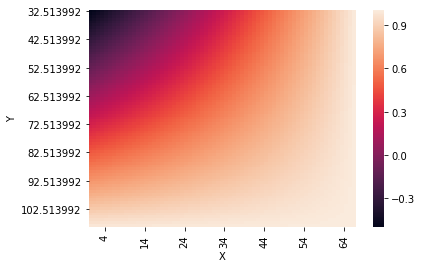

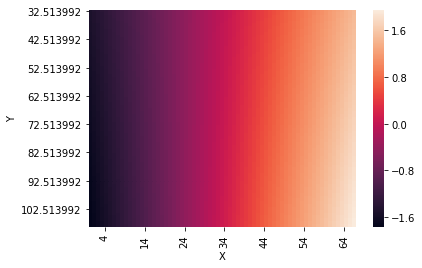

In [72]:
from scipy import interpolate
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def find_offset(x,y,z):
    f = interpolate.interp2d(x, y, z, kind='linear')

    xnew = np.arange(min(x), max(x))
    ynew = np.arange(min(y), max(y))

    xx, yy = np.meshgrid(xnew, ynew)

    znew = f(xnew, ynew)
    z_flat = [z for sublist in znew.tolist() for z in sublist]

    xx, yy = np.meshgrid(xnew, ynew)
    x_flat = [x for sublist in xx.tolist() for x in sublist]
    y_flat = [y for sublist in yy.tolist() for y in sublist]

    all_data = pd.DataFrame({
        'X':x_flat,
        'Y':y_flat,
        'Offset':z_flat
    })

    result = all_data.pivot(index='Y', columns='X', values='Offset')
    
    fig, ax = plt.subplots()
    
    ax = sns.heatmap(result,ax=ax,xticklabels=10,yticklabels=10)
    xt = np.arange(int(min(x)), int(max(x)), step=10)
    xl = [str(num) for num in xt]
    yt = np.arange(int(min(y)), int(max(y)), step=10)
    yl = [str(num) for num in yt]
    plt.xticks(xt,xl)
    print(yt)
    plt.yticks(yt,yl)
    
    fig.show()
    return f

x = [4.4244227, 70.58498, 62.456387, 9.363313]
y = [32.513992, 37.18666, 107.56875, 109.41835]
zx = [-0.5, 1.0, 1.0, 1.0]
zy = [-1.5, 1.5, 1.5, -1.5]

# x = [10,70,80,20]
# y = [40,55,100,115]
# zx = [1,-1,0,-0.5]
# zy = [0.5,-1,0,0]

fx = find_offset(x,y,zx)
fy = find_offset(x,y,zy)

new_x = [6,32,70,60]
new_y = []



